# 決定木を用いた乳癌診断

In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
data.data.shape

(569, 30)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data.data[0].shape

(30,)

TypeError: Invalid shape (30,) for image data

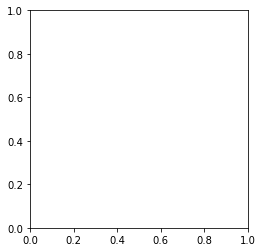

In [6]:
plt.imshow(data.data[0])
plt.show()

In [2]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
# 目標ラベル
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.data, data.target,
                                                    test_size=0.2, random_state=42)

In [5]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

## 決定木の構築

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [7]:
model.score(x_test, y_test)

0.9385964912280702

Graphviz画像生成コマンド
`dot -Tpng 5_2.dot -o 5_2.png`

In [8]:
from sklearn.tree import export_graphviz

with open('5_2.dot', 'w') as fp:
    fp = export_graphviz(model, out_file=fp,
                         feature_names=data.feature_names,
                         class_names=data.target_names)

### モデルの評価
モデルを評価するために様々なmax_depthの値で決定木を学習させる。<br>
結果を見ると、木が深いほど性能が上がるということが示唆された。

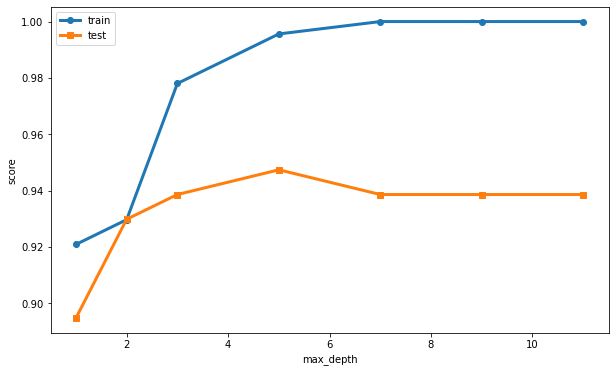

In [9]:
import numpy as np

max_depths = np.array([1, 2, 3, 5, 7, 9, 11])

train_score = []
test_score = []

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(x_train, y_train)
    train_score.append(model.score(x_train, y_train))
    test_score.append(model.score(x_test, y_test))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_score, marker='o', linewidth=3, label='train')
plt.plot(max_depths, test_score, marker='s', linewidth=3, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend()
plt.show()

あるノードを葉ノードにするために必要なデータ点の最小数の検証<br>
結果を見ると、この学習セットでは、`min_samples_leaf`を増やしても、良い結果が得られないと考えられる。

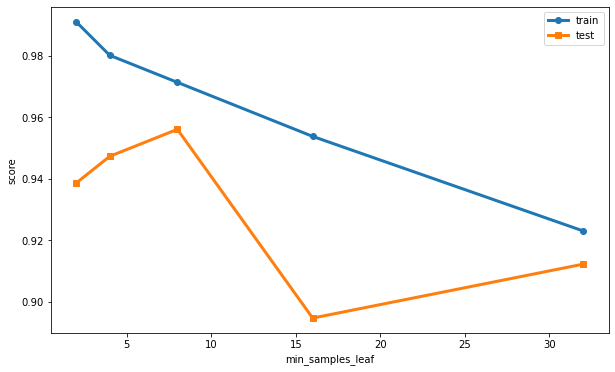

In [10]:
train_score = []
test_score = []
min_samples = np.array([2, 4, 8, 16, 32])

for min_sample in min_samples:
    model = DecisionTreeClassifier(min_samples_leaf=min_sample)
    model.fit(x_train, y_train)
    train_score.append(model.score(x_train, y_train))
    test_score.append(model.score(x_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(min_samples, train_score, marker='o', linewidth=3, label='train')
plt.plot(min_samples, test_score, marker='s', linewidth=3, label='test')
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.legend()
plt.show()